In [6]:
from utils import *
from gurobipy import Env

env = Env()
env.setParam('LogToConsole', 0)
env.start()
filename = "test6"
n = 200
K = 5
seed = 5
l = 3
alpha = 1/2
beta = [1,1,1]
lower = 2
upper = n
M = 1e6
np.random.seed(seed)
labels = np.random.choice([0,1,2], p= [0.1,0.2,0.7], size=n)

X,Y,archetype = synthetic_data(n,K,seed)
centers, dist, q, clusters, clusters_assign, t = initialize_clusters(X,K,l,alpha,beta,n,labels,M,lower,upper)

/Users/yunhanluo/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Set parameter Username


Optimizing Cluster Centers: 100%|██████████| 300/300 [00:00<00:00, 10125.22it/s, Status=SUCCESS]

Set parameter Username



/Users/yunhanluo/opt/anaconda3/lib/python3.9/site-packages/repliclust/base.py:414: RuntimeWarning: invalid value encountered in cast
  y = np.full(n, fill_value=np.nan).astype(int)


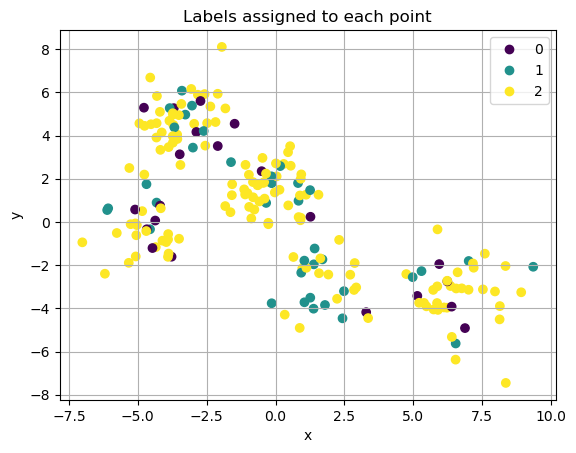

In [7]:
scatter = plt.scatter(X[:,0],X[:,1],c=labels,label="Groups")
plt.xlabel('x')
plt.ylabel('y')
plt.title('Labels assigned to each point')
plt.grid(True)
plt.legend(handles=scatter.legend_elements()[0], labels=[0,1,2])
plt.show()

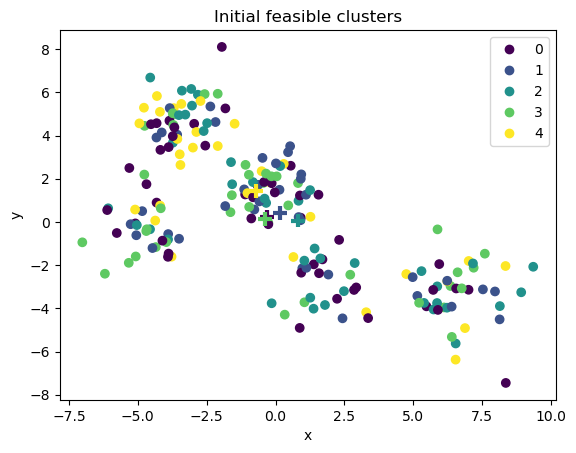

In [9]:
scatter = plt.scatter(X[:,0],X[:,1],c=clusters_assign,label="Groups")
plt.xlabel('x')
plt.ylabel('y')
plt.title('Initial feasible clusters')
plt.legend(handles=scatter.legend_elements()[0], labels=[0,1,2,3,4])
plt.scatter([x[0] for x in centers],[x[1] for x in centers], marker="+", c=[0,1,2,3,4], s=100, linewidth=3)
plt.show()

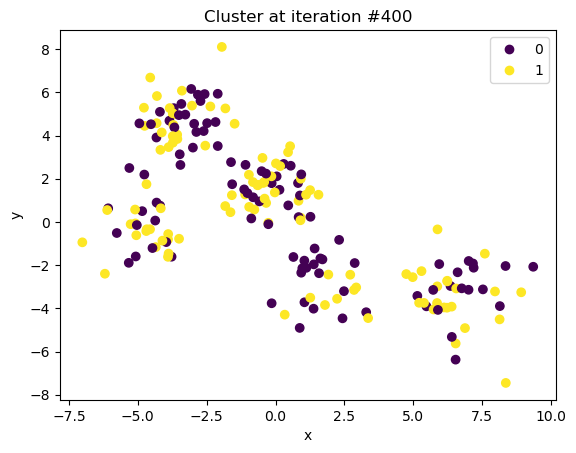

In [12]:
n = 400
scatter = plt.scatter(X[:,0],X[:,1],c=parsed_data[n]['new_cluster'],label="Groups")
plt.xlabel('x')
plt.ylabel('y')
plt.title('Cluster at iteration #'+str(n))
plt.legend(handles=scatter.legend_elements()[0], labels=[0,1])
plt.show()

In [6]:
size_new_clusters = [sum(parsed_data[i]['new_cluster']) for i in range(len(parsed_data))]

KeyError: 'new_cluster'

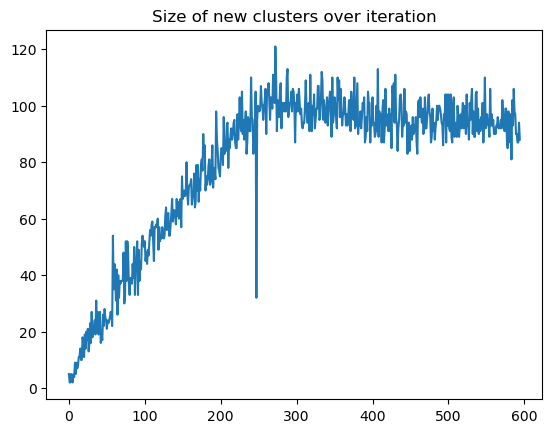

In [15]:
plt.plot(size_new_clusters)
plt.title("Size of new clusters over iteration")
plt.show()

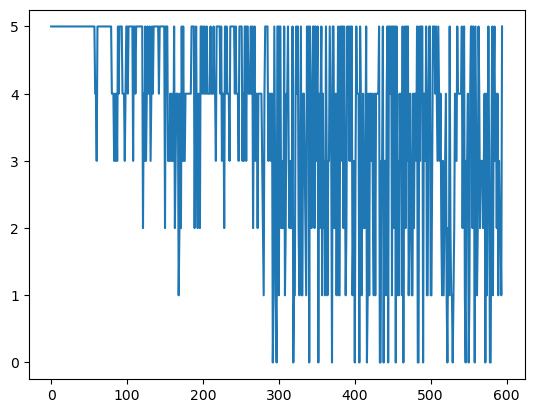

In [16]:
sizes_of_solutions = [sum(parsed_data[i]['master_solution']) for i in range(len(parsed_data))]
plt.plot(sizes_of_solutions)

In [17]:
sum(parsed_data[400]['master_solution'])

0

In [18]:
import re
import datetime

# Function to parse the log file
def parse_log_file(file_path):
    data = []

    with open(file_path, 'r') as file:
        for line in file:
            # Check if the line contains 'Best objective'
            if 'Master Solution' in line:
                data.append(list(map(int, re.search(r'\[(.*?)\]', line).group(1).split(', '))))

    return data

# Example usage:
log_file_path = './outputs/out6_200_display.txt'
parsed_data2 = parse_log_file(log_file_path)

In [19]:
sum(parsed_data2[60])

4

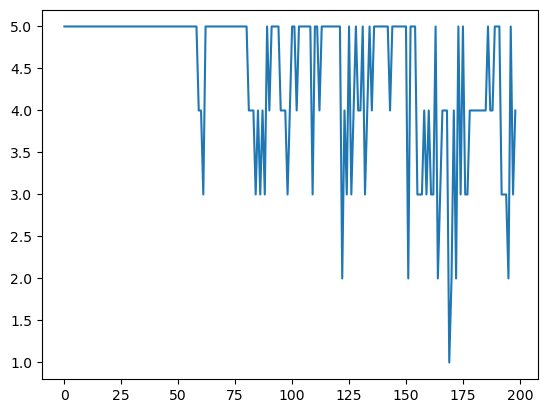

In [20]:
sizes = [sum(i) for i in parsed_data2]
plt.plot(sizes)

## Slack

In [2]:
import matplotlib.pyplot as plt

In [14]:
import re
import datetime

# Function to parse the log file
def parse_log_file(file_path):
    data = []
    clusters = {}
    r = []

    with open(file_path, 'r') as file:
        for line in file:
            if 'Pricing New cluster' in line:
                pattern = re.compile(r'(\d+) Solution (\d+) Pricing New cluster \[([01, ]+)\]')
                # Match the pattern in the log line
                match = pattern.match(line)

                if match:
                    iteration = int(match.group(1))
                    solution_number = int(match.group(2))
                    cluster_values = list(map(int, match.group(3).split(', ')))
                    if iteration not in clusters:
                        clusters[iteration] = []
                    clusters[iteration].append(cluster_values)
                else:
                    print("No match found in the log line.")
            if 'Iteration #' in line:
                iteration_data = {'iteration': int(re.search(r'\d+', line).group())}
                # Read the next few lines and save the result
                for _ in range(7):  # Assuming 8 lines follow 'Best objective' based on the provided example
                    line = next(file)
                    # elif 'Pricing New cluster' in line:
                    #     iteration_data['new_cluster'] = list(map(int, re.search(r'\[(.*?)\]', line).group(0).replace('[', '').replace(']', '').split(', ')))
                    if 'Time' in line:
                        time_str = re.search(r'\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}\.\d+', line).group()
                        iteration_data['time'] = datetime.datetime.strptime(time_str, "%Y-%m-%d %H:%M:%S.%f")
                    elif 'Slack variables' in line:
                        iteration_data['Slack variables'] = list(map(float, re.search(r'\[(.*?)\]', line).group(1).split(', ')))
                    elif 'Sum of Slack Variables' in line:
                        iteration_data['Sum of Slack Variables'] = float(re.search(r'-?\d+\.\d+', line).group())
                    elif 'Master Objective' in line:
                        iteration_data['master_objective'] = float(re.search(r'-?\d+\.\d+', line).group())
                    elif 'Master Solution' in line:
                        iteration_data['master_solution'] = list(map(float, re.search(r'\[(.*?)\]', line).group(1).split(', ')))
                    elif 'Master Dual' in line:
                        iteration_data['master_dual'] = list(map(float, re.search(r'\[(.*?)\]', line).group(1).split(', ')))
                
                data.append(iteration_data)
            if 'Result' in line:
                for _ in range(10):
                    line = next(file)
                    if 'r: ' in line:
                        r = list(map(float, re.search(r'\[(.*?)\]', line).group(1).split(', ')))


    return data,clusters,r

# Example usage:
log_file_path = './outputs/out8_slack1.txt'
parsed_data,clusters,r = parse_log_file(log_file_path)

In [16]:
len(r)

1455

In [19]:
len(parsed_data[120]['master_solution'])

1146

In [5]:
parsed_data[100]['master_objective']

122.73955054772384

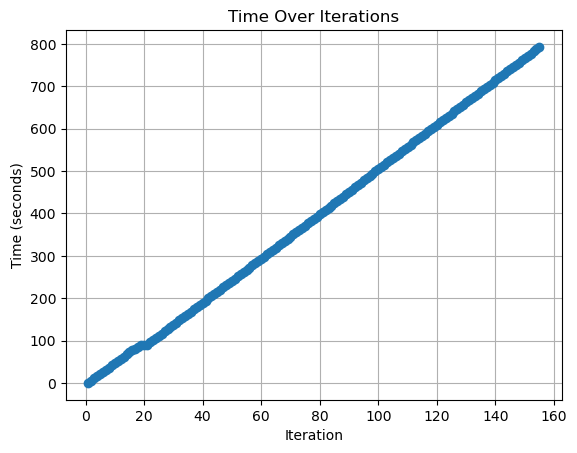

In [20]:
iterations = [iteration['iteration'] for iteration in parsed_data]
times = [iteration['time'] for iteration in parsed_data]


time_seconds = [(time - times[0]).total_seconds() for time in times]

plt.plot(iterations, time_seconds, marker='o')
plt.xlabel('Iteration')
plt.ylabel('Time (seconds)')
plt.title('Time Over Iterations')
plt.grid(True)
plt.show()

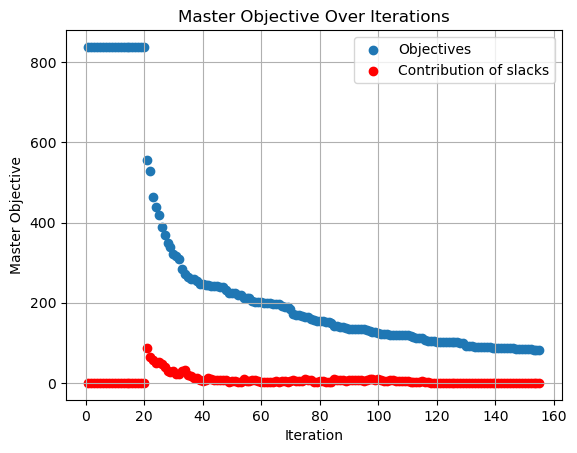

In [22]:
iterations = [iteration['iteration'] for iteration in parsed_data]
objectives = [iteration['master_objective'] for iteration in parsed_data]
slacks = [20 * iteration['Sum of Slack Variables'] for iteration in parsed_data]

plt.scatter(iterations, objectives,label='Objectives')
plt.scatter(iterations, slacks, c = 'r',label='Contribution of slacks')
plt.xlabel('Iteration')
plt.ylabel('Master Objective')
plt.title('Master Objective Over Iterations')
plt.grid(True)
plt.legend()
plt.show()

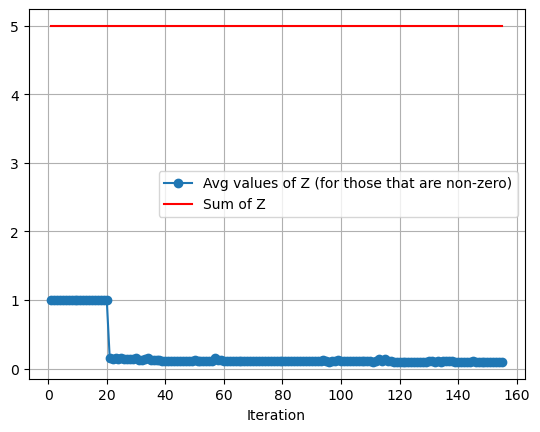

In [11]:
sizes_of_solutions = []
sum_sizes_of_solutions = []
num_nonzero_values = []
for i in range(len(parsed_data)):
  sol = parsed_data[i]['master_solution']
  counter = 0
  for j in sol:
    if j > 0:
      counter += 1
  num_nonzero_values.append(counter)
  sizes_of_solutions.append(sum(sol) / counter)
  sum_sizes_of_solutions.append(sum(sol))

plt.plot(iterations, sizes_of_solutions, marker='o',label='Avg values of Z (for those that are non-zero)')
plt.plot(iterations, sum_sizes_of_solutions, c = 'r',label='Sum of Z')
plt.xlabel('Iteration')
plt.grid(True)
plt.legend()
plt.show()

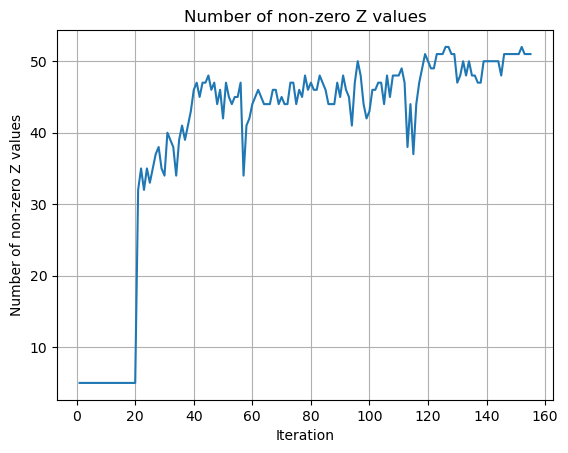

In [23]:
plt.plot(iterations, num_nonzero_values)
plt.xlabel('Iteration')
plt.ylabel('Number of non-zero Z values')
plt.title('Number of non-zero Z values')
plt.grid(True)
plt.show()

In [3]:
import outputs_parser_helper

In [4]:
s,r,t = outputs_parser_helper.get_values()

In [70]:
sizes_of_new_clusters = [sum(i) for i in s]

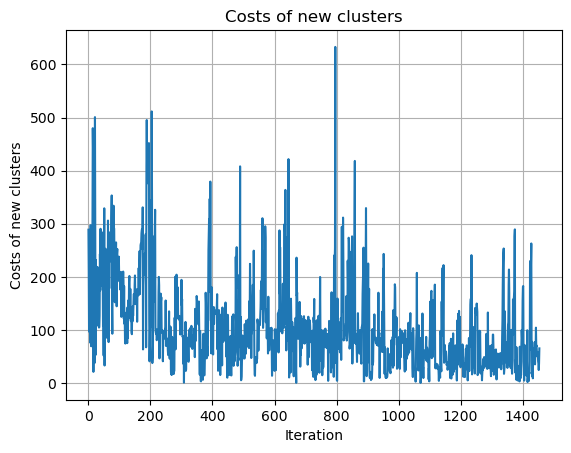

In [25]:
plt.plot(r)
plt.xlabel('Iteration')
plt.ylabel('Costs of new clusters')
plt.title('Costs of new clusters')
plt.grid(True)
plt.show()

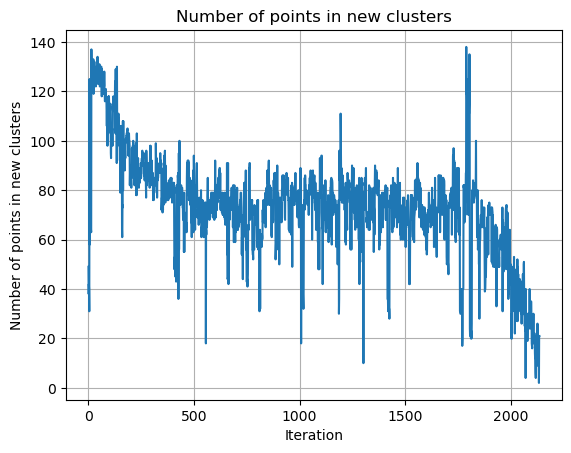

In [82]:
plt.plot(sizes_of_new_clusters)
plt.xlabel('Iteration')
plt.ylabel('Number of points in new clusters')
plt.title('Number of points in new clusters')
plt.grid(True)
plt.show()

In [30]:
objective_no_slacks = []
for d in (parsed_data[30:31]):
  sol = d['master_solution']
  total_obj = d['master_objective']
  slacks = 20 * sum(d['Slack variables'])
  res = 0
  print(len(sol))
  print(len(r))
  #print(np.array(r) @ np.array(sol))
  for i,j in enumerate(sol):
    #print("r[i],j",r[i],j,r[i]*j)
    if j != 0:
      res += r[i] * j
  print(res)
  print(total_obj, res + slacks)
  objective_no_slacks.append(res)
#plt.plot(objective_no_slacks)

296
1455
295.8545891756053
317.0869617155092 317.0869617155092


In [20]:
print(parsed_data[100]['Slack variables'])
print(sum(parsed_data[100]['Slack variables']))

[0.0, 0.0, 0.0, 0.0, 0.0, 0.02180251822398946, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.05791915175612962, 0.0, 0.0, 0.0, 0.0, 0.3226640159045723, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
0.40238568588469137
